# <center> 👉 class_11_1 IP » _Image Matching - Average Hash Matching, Template Matching_ </center>

# ▣ Image Matching  

> image matching is a technique that compares two different images to __find out if there is a matching object of the same shape__.   
>- The way to find an object in an image is __to convert the meaningful features in the image into the appropriate numbers__ and __compare those numbers to determine how similar they are__.  
>- Simply put, it is the task of measuring the similarity between two images.   
>- Numbers that can represent features are called feature vectors or feature descriptors.  
>> 이미지 매칭이란 서로 다른 두 이미지를 비교해서 짝이 맞는 같은 형태의 객체가 있는지 찾아내는 기술을 말합니다.   
>>- 이미지에서 객체를 찾는 방법은 이미지에서 의미 있는 특징들을 적절한 숫자로 변환하고 그 숫자들을 서로 비교해서 얼마나 비슷한지 판단하는 것입니다.  
>>- 쉽게 말해 두 이미지 간 유사도를 측정하는 작업입니다.   
>>- 특징을 대표할 수 있는 숫자를 특징 벡터 혹은 특징 디스크립터라고 합니다.  

## ▶ Average Hash Matching  

Average Hash Matching uses the mean value to obtain the feature vector.

When comparing the average hash to other images, you need to use the __Hamming distance__.   
- The higher the order of digits, the greater the difference between Euclid distances.   
- Because the hamming distance only takes into account __how many numbers are different__.   
- __When comparing images, it's not so much the size of the average hash number as how many similar digits it is__.   

> 평균 해시를 다른 이미지와 비교할 때는 해밍 거리를 써야 합니다.   
>- 유클리드 거리는 자릿수가 높을수록 차이가 크게 벌어지지만   
>- 해밍 거리는 몇 개의 숫자가 다른가만을 고려하기 때문입니다.   
>- 이미지를 비교하는데 평균 해시 숫자의 크기가 중요하기보다는 얼마나 유사한 자릿수가 많은지가 더 중요합니다

Here's an example of converting a pistol image to a 16 x 16 average hash to get a feature vector.

In [6]:
# avg_hash.py

import cv2

img = cv2.imread('./images/practice_img/pistol.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.resize(gray, (16,16)) # 16x16 
avg = gray.mean()                # Finding the Average Value of an Image
bin = 1 * (gray > avg)           # Based on the average value, Pixels larger than the average value are 1, smaller pixels are 0
print(bin)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


In [7]:
# Convert a binary string to a hexadecimal string
dhash = []
for row in bin.tolist():
    s = ''.join([str(i) for i in row])
    dhash.append('%02x'%(int(s,2)))
dhash = ''.join(dhash)
print(dhash)

ffff8000800080008000813fc1ffc1ffc07fc3ffc7ffc7ff87ff87ff87ffc7ff


In [8]:
cv2.namedWindow('pistol', cv2.WINDOW_GUI_NORMAL) # GUI (graphical user interface)
cv2.imshow('pistol', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Pistol Img : https://drive.google.com/file/d/137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp/view

In [9]:
# Find an image of a pistol among the objects (avg_hash_matching.py)

import cv2
import numpy as np
import glob

img = cv2.imread('./images/practice_img/pistol2.png')
cv2.imshow('query', img)

search_dir = './images/practice_img'

def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    distance = (a !=b).sum()  # The sum of things with different values of the same digit
    return distance

query_hash = img2hash(img)  # Obtaining the Hash 

img_path = glob.glob(search_dir+'/*.png')
for path in img_path:
    img = cv2.imread(path)
    cv2.imshow('searching...', img)
    cv2.waitKey(5)
    a_hash = img2hash(img)
    dst = hamming_distance(query_hash, a_hash)
    if dst/256 < 0.15:          # Output within 15% of hammering distance
        print(path, dst/256)
        cv2.imshow(path, img)
cv2.destroyWindow('searching...')
cv2.waitKey(0)
cv2.destroyAllWindows()

./images/practice_img\pistol2.png 0.0
./images/practice_img\pistol7.png 0.12890625


## ▶ Template Matching 

Template matching is a technique for finding areas of an image that are similar to a patch (template).   
- A patch is a small image with certain features.   
- The goal of template matching is to find the patch/template in an image.   
- To find it, the user has to give two input images:   
>- Source Image (S) – The image to find the template in,   
>- and Template Image (T) – The image that is to be found in the source image.  

    > Template matching은 패치(템플릿)와 유사한 이미지 영역을 찾는 기술입니다.   
    >- 패치는 특정 기능이 있는 작은 이미지입니다.   
    >- Template matching의 목표는 이미지에서 패치/템플릿을 찾는 것입니다.   
    >- 이를 찾으려면 사용자는 두 개의 입력 이미지를 제공해야 합니다.   
    >>- 소스 이미지(S) – 템플릿을 찾을 이미지입니다.   
    >>- 템플릿 이미지(T) – 소스 이미지에서 찾을 수 있는 이미지입니다.  
    
- It is basically a method for __searching and finding the location of a template image in a larger image__.  
- The idea here is to find identical regions of an image that match a template we provide, giving a threshold   
- The threshold depends on the accuracy with which we want to detect the template in the source image.  
- For instance, if we are applying face recognition and we want to detect the eyes of a person, we can provide a random image of an eye as the template and search for the source (the face of a person).
- In this case, since “eyes” show a large number of variations from person to person, even if we set the threshold as 50%(0.5), the eye will be detected.  
- In cases where almost identical templates are to be searched, the threshold should be set high.(t>=0.8)  

    >- 기본적으로 큰 이미지에서 템플릿 이미지의 위치를 검색하고 찾는 방법입니다.  
    >- 여기서 아이디어는 우리가 제공하는 템플릿과 일치하는 이미지의 동일한 영역을 찾아 임계값을 제공하는 것입니다.   
    >- 임계값은 소스 이미지에서 템플릿을 감지하려는 정확도에 따라 다릅니다.  
    >- 예를 들어, 얼굴 인식을 적용하고 사람의 눈을 감지하려는 경우 임의의 눈 이미지를 템플릿으로 제공하고 소스(사람의 얼굴)를 검색할 수 있습니다.  
    >- 이 경우 "눈"은 사람마다 많은 변화를 보이기 때문에 임계값을 50%(0.5)로 설정해도 눈이 검출됩니다.  
    >- 거의 동일한 템플릿을 검색해야 하는 경우 임계값을 높게 설정해야 합니다. (th>=0.8)  

※ How to find the characteristic vector of the picture.  
>- Shrink the image to a specific size regardless of the aspect ratio.    
>- Get the average value of all pixels and change the value of each pixel to 0 if it is less than the average, or 1 if it is larger.  
>- Converts each pixel value consisting of 0 or 1 only to 1 row and 1 column. (This can be seen as a single binary number.)  
>- At this point, you need to shrink the two images you want to compare to the same size.     
>- That's why the number of 0s and 1s is also the same. (When expressed in binary, the number of bits is the same.)     
>- If binary is too long and uncomfortable to read, you can convert it to decimal or hexadecimal as needed.   

>>※ 그림의 특징 벡터를 구하는 방법.
>>- 이미지를 가로 세로 비율과 무관하게 특정한 크기로 축소합니다.  
>>- 픽셀 전체의 평균값을 구해서 각 픽셀의 값이 평균보다 작으면 0, 크면 1로 바꿉니다.  
>>- 0 또는 1로만 구성된 각 픽셀 값을 1행 1열로 변환합니다. (이는 한 개의 2진수 숫자로 볼 수 있습니다.)  
>>- 이때 비교를 하고자 하는 두 이미지를 같은 크기로 축소해야 합니다.   
>>- 그렇기 때문에 0과 1의 개수도 동일합니다. (2진수로 표현했을 때 비트 개수가 같다고 볼 수 있습니다.)   
>>- 2진수가 너무 길어서 보기 불편하다면 필요에 따라 10진수나 16진수 등으로 변환해서 사용할 수 있습니다.  

### ■ How does Template Matching Work?  

- The template image simply slides over the input image (as in 2D convolution)  
- The template and patch of input image under the template image are compared.  
- The result obtained is compared with the threshold.  
- If the result is greater than the threshold, the portion will be marked as detected.  

    >- 템플릿 이미지는 단순히 입력 이미지 위로 슬라이드됩니다(2D 컨볼루션).  
    >- 템플릿 이미지 아래에 있는 입력 이미지의 템플릿과 패치를 비교합니다.  
    >- 얻은 결과를 임계값과 비교합니다.  
    >- 결과가 임계값보다 크면 해당 부분이 감지된 것으로 표시됩니다. 
    
There are several ways to measure similarity.
Among them, the most representative ones are __Euclidian distance__ and __Hamming distance__.
>- __Euclidean distance__ calculates the distance as the difference between two values.
>>- For example, if there are 1 and 7 as values to be compared to 5, the Euclidean distance between 5 and 1 is 5-1 = 4, and the Euclidean distance between 5 and 7 is 7-5 = 2.
>>- The smaller the Euclidean distance, the more similar the two numbers are, so we conclude that 5 is more similar to 7 than to 1.
>- __Hamming distance__ can be calculated only when two values have the same length.
>>- Hamming distance calculates similarity by determining how many of the same digit values of two numbers are different.
>>- For example, when there are 12354 and 92345 as values to compare with 12345, the last digits of 12345 and 12354 are different at 45 and 54, so the Hamming distance is 2.
>>- On the other hand, 12345 and 92345 differ by only one digit, 1 and 9, so the Hamming distance is 1. Therefore, we believe that 12345 is more similar to 92345 than to 12354.    

>- 비슷한 정도를 측정하는 방법에는 여러 가지가 있습니다. 
>- 그중 가장 대표적인 것이 유클리드 거리(Euclidian distance)와 해밍 거리(Hamming distance)입니다. 
>- 유클리드 거리는 두 값의 차이로 거리를 계산합니다. 
>>- 예를 들어 5와 비교할 값으로 1과 7이 있다면 5와 1의 유클리드 거리는 5-1 = 4이고, 5와 7의 유클리드 거리는 7-5 = 2입니다.   
>>- 유클리드 거리가 작을수록 두 수는 비슷한 수라고 판단하므로 5는 1보다는 7과 더 유사하다고 결론짓습니다. 
>- 해밍 거리는 두 값의 길이가 같아야 계산할 수 있습니다. 
>>- 해밍 거리는 두 수의 같은 자리 값 중 서로 다른 것이 몇 개인지를 판단하여 유사도를 계산합니다. 
>>- 예를 들어 12345와 비교할 값으로 12354와 92345가 있을 때 12345와 12354의 마지막 자리가 45와 54로 다르므로 해밍 거리는 2입니다.  
>>- 반면 12345와 92345는 1과 9 한자리만 다르므로 해밍 거리는 1입니다. 따라서 12345는 12354보다 92345와 더 유사하다고 판단합니다. 

- In the function **cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)**   
>- the first parameter is the main image,   
>- the second parameter is the template to be matched and   
>- the third parameter is the method used for matching.

### ● OpenCV Template Matching  

Template Matching is a method used for finding the location of a template image in a larger image.   
In OpenCV, we use a function cv.matchTemplate() for template matching.   
- It simply slides the template image over the larger input image (as in 2D convolution) and compares the template image with the patch of input image under the template image. It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with the template.   
- If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1).Upon getting results, the best matches can be found as global minimums (when TM_SQDIFF was used) or maximums (when TM_CCORR or TM_CCOEFF was used) using the minMaxLoc function. Take it as the top-left corner of the rectangle and take (w,h) as width and height of the rectangle.   
- That rectangle is your region of template.

Syntax:
    
**result = cv.matchTemplate(image, templ, method,mask)**  

Parameters:

- image: Image where the search is running. It must be 8-bit or 32-bit floating-point.
- templ: Searched template. It must be not greater than the source image and have the same data type.
- method: Parameter specifying the comparison method
>- cv2.TM_SQDIFF: Squared Difference Matching, Perfect Match:0, not Match: big value  
>- cv2.TM_SQDIFF_NORMED: Normalization of Squared Difference Matching    
>- cv2.TM_CCORR: Correlation Matching , Perfect Match:big value, not Match: 0 
>- cv2.TM_CCORR_NORMED: Normalization of Correlation Matching
>- cv2.TM_CCOEFF: Correlation coefficient matching, Perfect Match:1, not Match:-1    
>- cv2.TM_CCOEFF_NORMED: Normalization of correlation coefficient matching     
- mask: Optional (TM_SQDIFF, TM_CCORR_NORMED)
- result: Map of comparison results. It must be single-channel 32-bit floating-point.   
>- If image is W×H and templ is w×h , then result is (W−w+1)×(H−h+1) 

**cv2.minMaxLoc(img)** : return  minVal, maxVal, minLoc, maxLoc

Template Matching Flag Formula : 

<img src='./images/practice_img/matching_eq.png'  width=800 height=800>

- For example, if you have a 4×4 original image and a 3×3 template image, you can look at it like the one below.
- You can make a total of 4 comparisons, and if you move them to an array, you'll have a size 2×2.

<img src='./images/practice_img/templit_match.webp'  width=400 height=400>

Example:

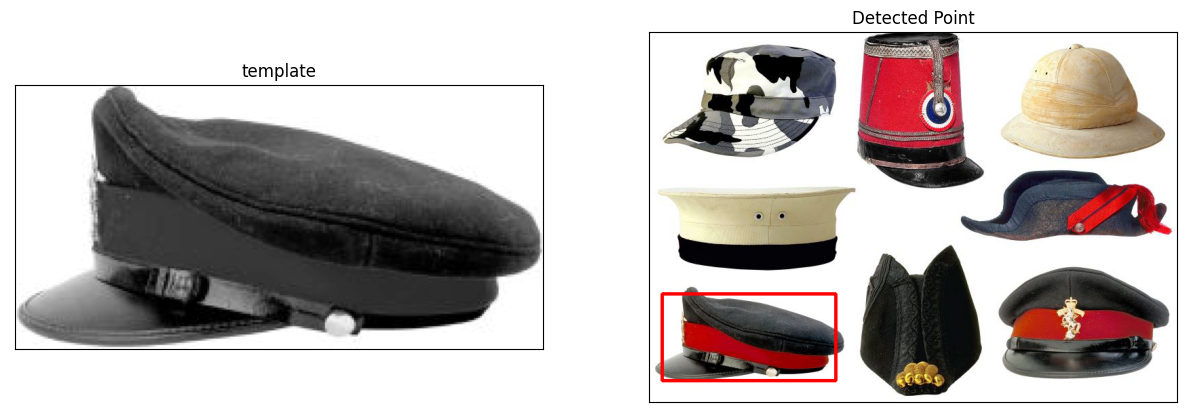

In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)
img = cv.imread('./images/practice_img/hats.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img2 = img.copy()
template = cv.imread('./images/practice_img/hat.jpg',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,eval('cv.TM_CCOEFF'))
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img,top_left, bottom_right, (0,0,255), 3)
plt.subplot(121),plt.imshow(template,'gray'),plt.title('template'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

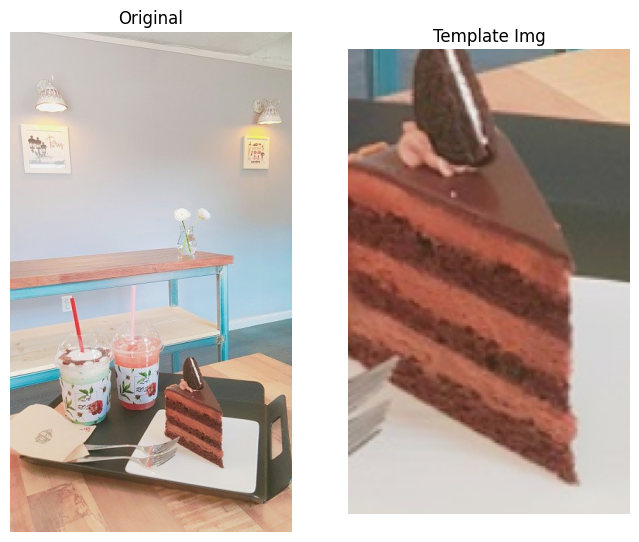

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=100)
imageFile = './images/practice_img/matching.jpg'
templateFile = './images/practice_img/matching_cake.png'
src = cv2.imread(imageFile)
temp = cv2.imread(templateFile)

plt.subplot(121), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('Original'),plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)), plt.title('Template Img'),plt.axis('off')

plt.show()

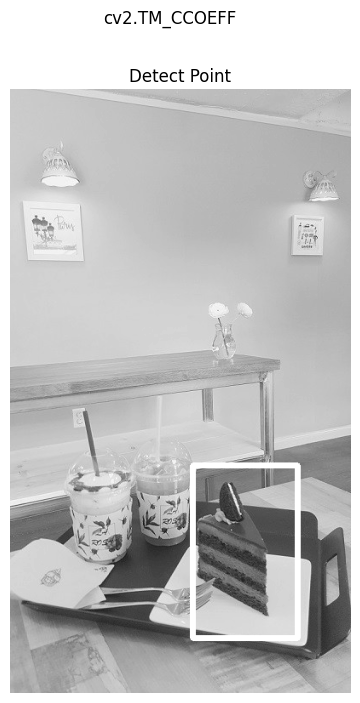

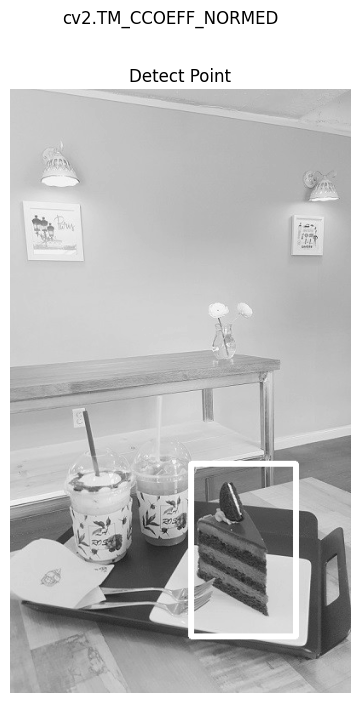

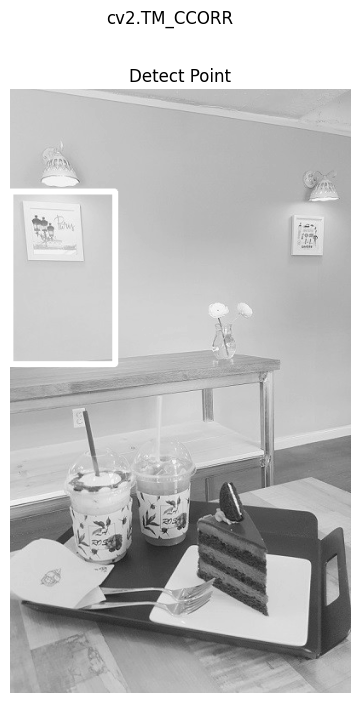

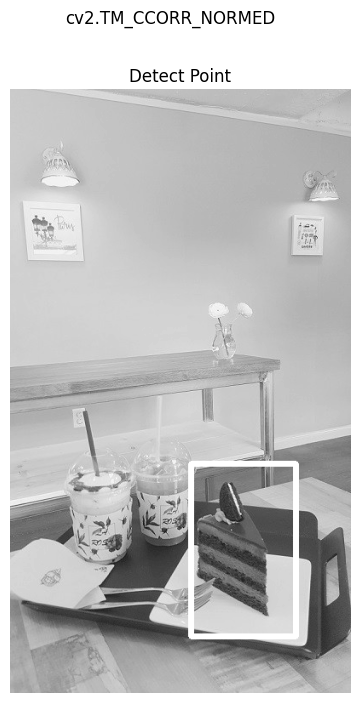

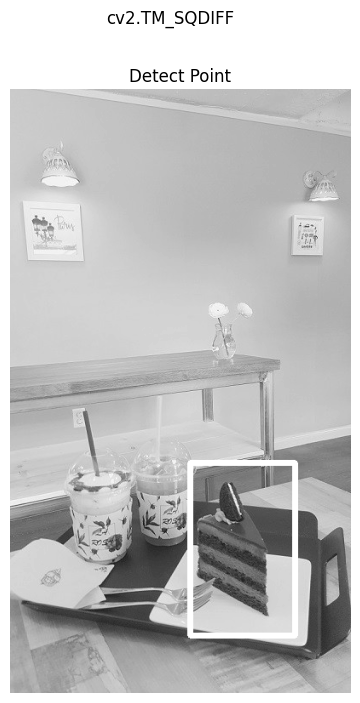

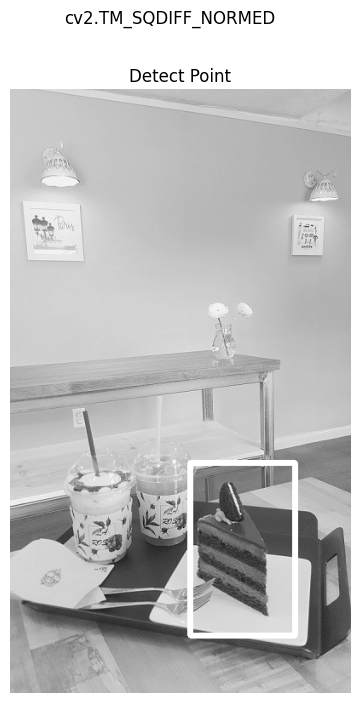

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

def templateM():
    imageFile = './images/practice_img/matching.jpg'
    templateFile = './images/practice_img/matching_cake.png'
    img1 = cv2.imread(imageFile,cv2.IMREAD_GRAYSCALE)
    img2 = img1.copy()
    temp = cv2.imread(templateFile,cv2.IMREAD_GRAYSCALE)
    w,h = temp.shape[::-1] 
    
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',         # matchTemplate method 
               'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    for meth in methods:
        img1 = img2.copy()
        method = eval(meth)
        try:
            res = cv2.matchTemplate(img1,temp,method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        except:
            print("error",meth)
            continue
        
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:  # TM_SQDIFF, TM_SQDIFF_NORMED : min val
            top_left = min_loc
        else:
            top_left = max_loc

        bottom_right = (top_left[0]+w, top_left[1]+h)
        cv2.rectangle(img1, top_left, bottom_right, 255, 5)  

        figure(figsize=(8, 8), dpi=100)
#         plt.subplot(121), plt.imshow(res,cmap='gray'), plt.title('Matching Result'),plt.axis('off')
#         plt.subplot(122), 
        plt.imshow(img1, 'gray'), plt.title('Detect Point'),plt.axis('off')
        plt.suptitle(meth)

        plt.show()

templateM()

- cv2. TM_SQDIFF, cv2. TM_SQDIFF_NORMED is the darkest place is the matching point,   
- For the rest, the brightest spot will be the matching point.

>- cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED 는 가장 어두운 곳이 매칭지점이고,   
>- 나머지는 가장 밝은 곳이 매칭 지점이 됩니다.

cv2.TM_CCOEFF_NORMED -0.17781662940979004 0.5126554369926453 (42, 0) (208, 43)


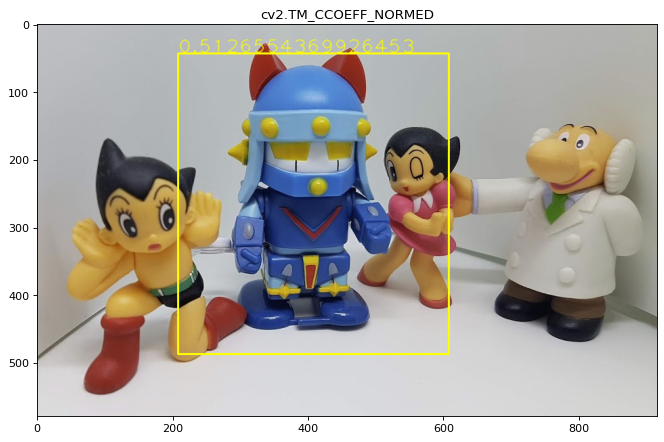

cv2.TM_CCORR_NORMED 0.8271381258964539 0.9236083626747131 (85, 6) (208, 43)


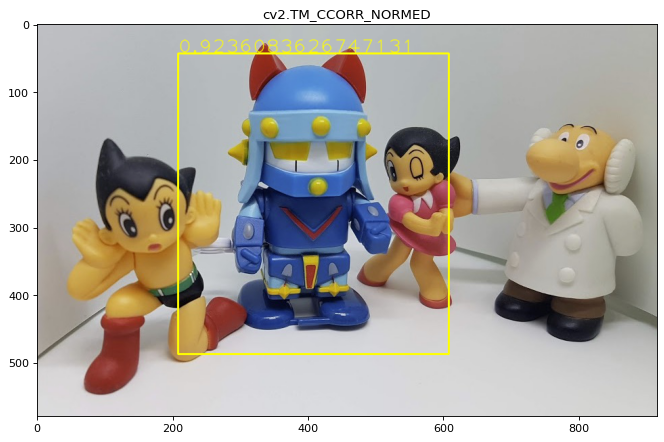

cv2.TM_SQDIFF_NORMED 0.17060725390911102 0.3689209520816803 (208, 43) (86, 7)


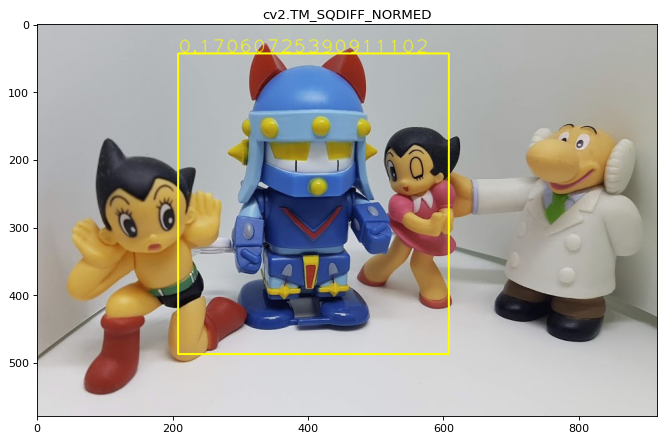

In [5]:
# template_matching.py
import cv2
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/practice_img/figures.jpg')
template = cv2.imread('./images/practice_img/taekwonv1.jpg') # dr_ochanomizu.jpg
th, tw = template.shape[:2]
cv2.imshow('template', template)

methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
    img_draw = img.copy()
    method = eval(method_name)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(method_name, min_val, max_val, min_loc, max_loc)
    figure(figsize=(8, 8), dpi=80)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,255,255),2)
    cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,255,255), 1, cv2.LINE_AA)
    cv2.imshow(method_name, img_draw)
#     plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
    plt.title(method_name)
    plt.show()    
cv2.waitKey(0)
cv2.destroyAllWindows()


### Template Matching with Multiple Objects

In the above example, we searched for template images that occurred only once in the image.   
Suppose a particular object occurs multiple times in a particular image.   
In this scenario, we will use the thresholding as cv2.minMaxLoc() just gives the location of one template image and it won't give all locations of the template images.  
Consider the following example.  

Input and template Img

<img src='./images/practice_img/mario2.png' width=400 height=400> <img src='./images/practice_img/mario_coin.png'  width=100 height=100>  

The result depends on how much threshold you set, which is the threshold value.
__The higher the threshold, the more images it will find that are exactly the same as the template image.__
- When the threshold is 0.5 
- When the threshold is 0.7
- When the threshold is 0.9 

threshold 값인 임계값을 얼마를 설정하느냐에 따라 결과가 달라집니다.  
임계값을 높게 설정할수록 템플릿이미지와 완벽히 똑같은 이미지만 찾아냅니다.
- 임계값이 0.5 일 때 
- 임계값이 0.7 일 때
- 임계값이 0.9 일 때


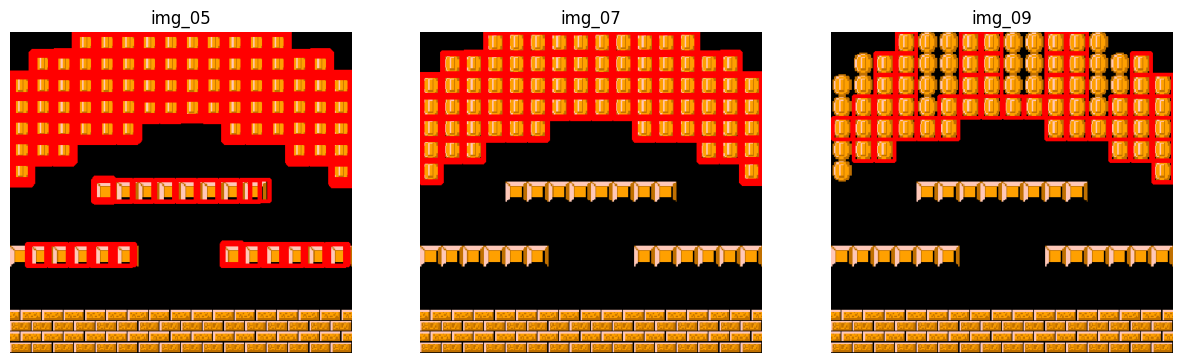

In [50]:
import cv2
import numpy as np

def nothing(x):
    pass

def tmpM(th):
    thr = th
    imageFile = "./images/practice_img/mario2.png"
    templateFile = "./images/practice_img/mario_coin.png"

    img = cv2.imread(imageFile)
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    tmp = cv2.imread(templateFile, cv2.IMREAD_GRAYSCALE)
    w, h = tmp.shape[::-1] 
    res = cv2.matchTemplate(imgray,tmp,cv2.TM_CCOEFF_NORMED) # CCOEFF_NORMED
    loc=np.where(res >= thr)
#     print(loc)
    for pt in zip(*loc[::-1]):
#         print(pt)
        cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,0,255), 3)

#     cv2.imshow('result',img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
        plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
        plt.title(method_name)
        plt.show()
    return img

img_05 = tmpM(0.5)
img_07 = tmpM(0.7)
img_09 = tmpM(0.9)

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img_05, cv2.COLOR_BGR2RGB)),plt.title('img_05'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(img_07, cv2.COLOR_BGR2RGB)),plt.title('img_07'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(img_09, cv2.COLOR_BGR2RGB)),plt.title('img_09'),plt.axis('off')
plt.show()

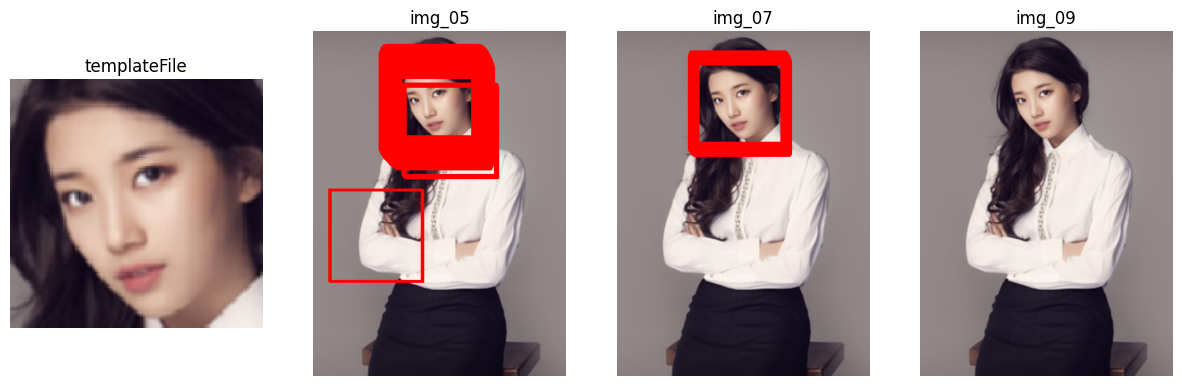

In [61]:
import cv2
import numpy as np

def nothing(x):
    pass

def tmpM(th):
    thr = th
    imageFile = "./images/practice_img/suji.png"
    templateFile = "./images/practice_img/suji_temp.png"

    img = cv2.imread(imageFile)
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    tmp = cv2.imread(templateFile, cv2.IMREAD_GRAYSCALE)
    w, h = tmp.shape[::-1] 
    res = cv2.matchTemplate(imgray,tmp,cv2.TM_CCOEFF_NORMED) 
    loc=np.where(res >= thr)

    for pt in zip(*loc[::-1]):
#         print(pt)
        cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,0,255), 1)

#     cv2.imshow('result',img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    return img

img_05 = tmpM(0.5)
img_07 = tmpM(0.7)
img_09 = tmpM(0.9)

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=100)
src = cv2.imread("./images/practice_img/suji_temp.png")

plt.subplot(141),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('templateFile'),plt.axis('off')
plt.subplot(142),plt.imshow(cv2.cvtColor(img_05, cv2.COLOR_BGR2RGB)),plt.title('img_05'),plt.axis('off')
plt.subplot(143),plt.imshow(cv2.cvtColor(img_07, cv2.COLOR_BGR2RGB)),plt.title('img_07'),plt.axis('off')
plt.subplot(144),plt.imshow(cv2.cvtColor(img_09, cv2.COLOR_BGR2RGB)),plt.title('img_09'),plt.axis('off')
plt.show()